In [173]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd
import time

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

'%.3f'

(1797, 64)


<Figure size 432x288 with 0 Axes>

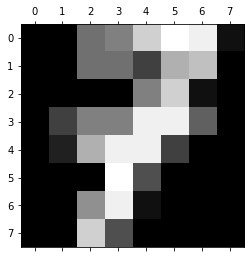

In [174]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
#ロジスティック回帰
from sklearn.linear_model import LogisticRegression
# SVM
from sklearn.svm import LinearSVC
# 決定木
from sklearn.tree import DecisionTreeClassifier
# k-NN
from sklearn.neighbors import KNeighborsClassifier
# random forest
from sklearn.ensemble import RandomForestClassifier


from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)

#data{ndarray, dataframe} of shape (1797, 64)
#The flattened data matrix. If as_frame=True, data will be a pandas DataFrame.
X = digits.data
#target: {ndarray, Series} of shape (1797,)
#The classification target. If as_frame=True, target will be a pandas Series.
Y = digits.target

#X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0,test_size=1000,train_size=100)
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
fig = plt.figure()

plt.gray()
plt.matshow(digits.images[7])
plt.show()

fig.savefig("img.png")

In [175]:
# train
print('train:',pd.DataFrame(y_train,columns=['label']).groupby('label')['label'].count())

print('test:',pd.DataFrame(y_test,columns=['label']).groupby('label')['label'].count())

train: label
0    141
1    139
2    133
3    138
4    143
5    134
6    129
7    131
8    126
9    133
Name: label, dtype: int64
test: label
0    37
1    43
2    44
3    45
4    38
5    48
6    52
7    48
8    48
9    47
Name: label, dtype: int64


/home/meito/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/meito/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


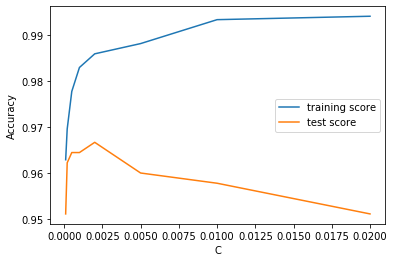

In [176]:
#LinearSVC

training_accuracy = []
test_accuracy = []

#C_settings = [0.0001,0.0003,0.001,0.003,0.01,0.03,0.1,0.3]

C_settings = [0.0001,0.0002,0.0005,0.001,0.002,0.005,0.01,0.02]
#C_settings = [10 ** i for i in range(-5, 0)]
N =len(C_settings)

for i in range(N):
    clf = LinearSVC(C = C_settings[i])
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train,y_train))
    
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(C_settings, training_accuracy, label='training score')
plt.plot(C_settings, test_accuracy, label='test score')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.legend()
plt.show()


In [177]:
#C =0.001
#train: 0.9829250185597624
#test: 0.9644444444444444
#C=0.01
#train: 0.9933184855233853
#test: 0.9577777777777777
#C = 0.1
#train: 0.9955456570155902
#test: 0.9422222222222222
#C = 1
#train: 0.9844097995545658
#test: 0.9244444444444444

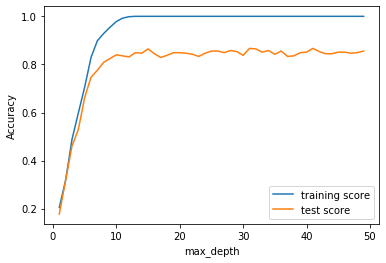

In [178]:
#DecisionTreeClassifier

training_accuracy = []
test_accuracy = []

max_depth_settings = range(1,50)

for max_depth in max_depth_setting:
    clf = DecisionTreeClassifier(max_depth = max_depth)
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train,y_train))
    
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(max_depth_settings, training_accuracy, label='training score')
plt.plot(max_depth_settings, test_accuracy, label='test score')
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.legend()
plt.show()

In [179]:
#max_depth=7
#train: 0.8982925018559762
#test: 0.78
#max_depth=10
#train: 0.9784706755753526
#test: 0.8266666666666667
#max_depth=15
#train: 1.0
#test: 0.8466666666666667
#max_depth=none
#train: 1.0
#test: 0.8355555555555556

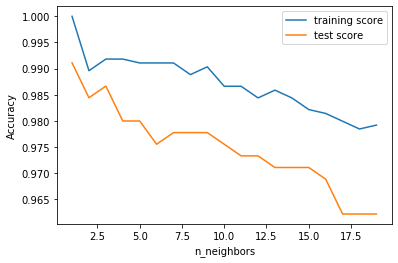

In [180]:
#KNeighborsClassifier
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1,20)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors = n_neighbors)
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train,y_train))
    
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label='training score')
plt.plot(neighbors_settings, test_accuracy, label='test score')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()
plt.show()
#単調減少

/home/meito/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/meito/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

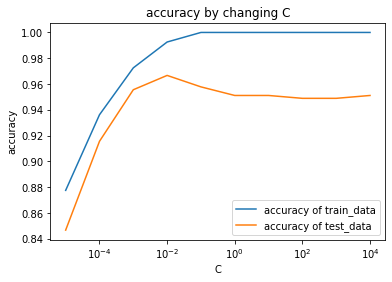

In [181]:
#LogisticRegression()
#うまくいかない
#なんか警告出たけどそのまんま

# 以下にコードを書いてください。
for C in C_list:
    model = LogisticRegression(C=C, random_state=42)
    model.fit(X_train, y_train)
 
    train_accuracy.append(model.score(X_train, y_train))
    test_accuracy.append(model.score(X_test, y_test))
 
# コードの編集はここまでです。
    
# グラフの準備
# semilogx()はxのスケールを10のx乗のスケールに変更する
plt.semilogx(C_list, train_accuracy, label="accuracy of train_data")
plt.semilogx(C_list, test_accuracy, label="accuracy of test_data")
plt.title("accuracy by changing C")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend()
plt.show()

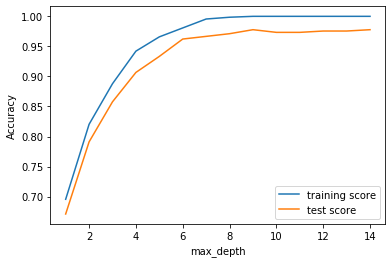

In [182]:
#RandomForestClassifier

training_accuracy = []
test_accuracy = []

max_depth_settings = range(1,15)
#次元のルート以下だっけ？
for max_depth in max_depth_settings:
    clf = RandomForestClassifier(max_depth = max_depth)
    clf.fit(X_train, y_train)
    
    training_accuracy.append(clf.score(X_train,y_train))
    
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(max_depth_settings, training_accuracy, label='training score')
plt.plot(max_depth_settings, test_accuracy, label='test score')
plt.ylabel('Accuracy')
plt.xlabel('max_depth')
plt.legend()
plt.show()

In [183]:
for model in [LinearSVC(C=0.01),DecisionTreeClassifier(),KNeighborsClassifier(n_neighbors=3),LogisticRegression(C=0.0025),RandomForestClassifier()]:
    fit_model = model.fit(X_train, y_train)
    pred_y = fit_model.predict(X_test)
    confusion_m = confusion_matrix(y_test, pred_y)
    print('confusion_matrix:')
    print(confusion_m)
    
    print('train:',fit_model.__class__.__name__ , fit_model.score(X_train,y_train))
    print('test:', fit_model.__class__.__name__ , fit_model.score(X_test, y_test))
    print('==============================\n')

/home/meito/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


confusion_matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  1  0  2  0]
 [ 0  0 42  2  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 44  0]
 [ 0  0  0  1  0  1  0  0  1 44]]
train: LinearSVC 0.9933184855233853
test: LinearSVC 0.9577777777777777

confusion_matrix:
[[33  0  1  2  0  1  0  0  0  0]
 [ 0 35  2  1  3  0  0  0  2  0]
 [ 1  0 37  3  0  0  0  0  3  0]
 [ 0  1  2 37  0  0  0  1  1  3]
 [ 2  2  0  0 33  0  0  0  0  1]
 [ 1  0  0  2  1 41  0  0  0  3]
 [ 1  1  0  1  0  0 49  0  0  0]
 [ 1  0  3  0  1  1  0 38  1  3]
 [ 0  2  2  4  0  0  0  0 38  2]
 [ 0  0  1  2  2  3  0  0  0 39]]
train: DecisionTreeClassifier 1.0
test: DecisionTreeClassifier 0.8444444444444444

confusion_matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  1  0  0  0  0]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  1 44  0  0  0  0  0  

/home/meito/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


confusion_matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  1  1  0  0  2]
 [ 0  0 44  0  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  3  1  0  0  1  0  0 43  0]
 [ 0  0  0  0  0  1  0  0  0 46]]
train: LogisticRegression 0.9814402375649591
test: LogisticRegression 0.9622222222222222

confusion_matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  1  0  0  0  0]
 [ 1  1 42  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  1  0  0 47  0  0]
 [ 0  2  0  1  0  0  0  1 44  0]
 [ 0  0  0  0  0  2  0  0  0 45]]
train: RandomForestClassifier 1.0
test: RandomForestClassifier 0.9711111111111111

